In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df = df.dropna()

# limitiamo il numero di righe a 2000
df = df[:2000]


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-121.927490,38.059695,31.324500,2589.922000,502.599500,1243.060500,467.335000,3.872077,191291.214000
std,0.593081,0.662002,14.048839,2107.927195,379.499356,964.577823,359.373145,1.915842,96796.265036
min,-124.300000,36.720000,2.000000,12.000000,4.000000,18.000000,7.000000,0.499900,22500.000000
25%,-122.240000,37.740000,19.000000,1406.250000,279.000000,691.750000,260.000000,2.523050,116250.000000
50%,-122.090000,37.860000,32.000000,2078.000000,406.000000,1003.000000,377.000000,3.490300,173850.000000
75%,-121.890000,37.990000,43.000000,3081.000000,605.250000,1495.000000,555.000000,4.916700,240700.000000
max,-119.770000,41.950000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,15.000100,500001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2010
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2000 non-null   float64
 1   latitude            2000 non-null   float64
 2   housing_median_age  2000 non-null   float64
 3   total_rooms         2000 non-null   float64
 4   total_bedrooms      2000 non-null   float64
 5   population          2000 non-null   float64
 6   households          2000 non-null   float64
 7   median_income       2000 non-null   float64
 8   median_house_value  2000 non-null   float64
 9   ocean_proximity     2000 non-null   object 
dtypes: float64(9), object(1)
memory usage: 171.9+ KB


In [17]:
# convertiamo la colonna ocean_proximity in numeri
df['ocean_proximity'].unique()
target = list(range(0, len(df['ocean_proximity'].unique())))
df['ocean_proximity'] = df['ocean_proximity'].replace(df['ocean_proximity'].unique(), target)

In [21]:
# Implementiamo la PCA
from sklearn.decomposition import PCA

# Creiamo un oggetto PCA scegliendo il numero di componenti, in questo caso 2
# l'oggetto PCA è un transformer che riduce le dimensioni del dataset originale 
# a 2 dimensioni ed e' un array numpy
pca = PCA(n_components=2)

# applichiamo la PCA al dataset creando un nuovo dataset con 2 dimensioni
pca_df = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])

# aggiungiamo la colonna target al nuovo dataset
pca_df['target'] = df['ocean_proximity']


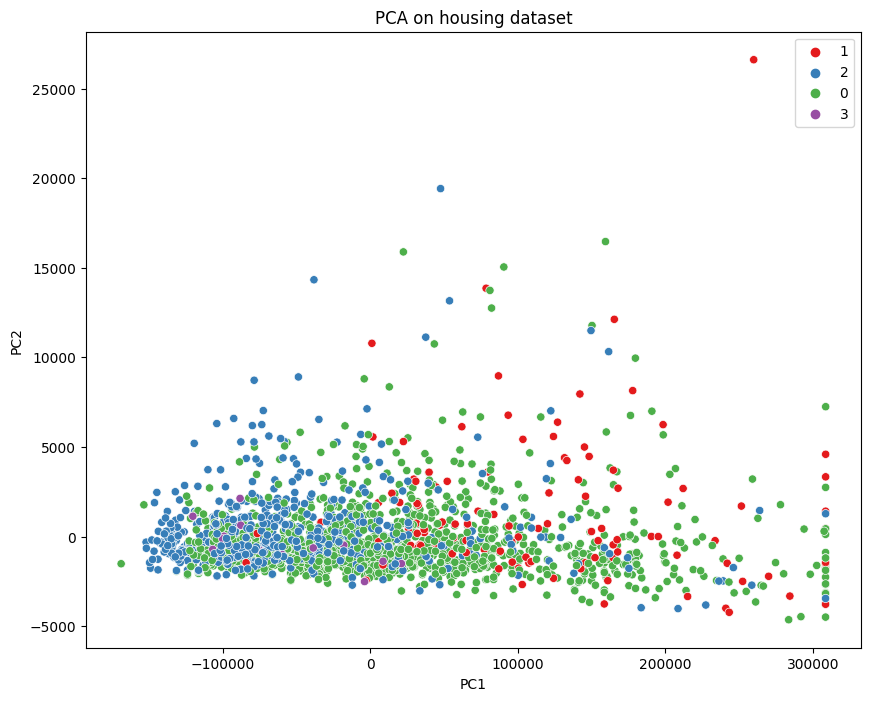

In [22]:
# printiamo a grafico il nuovo dataset
plt.figure(figsize=(10,8))
sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue="target", palette="Set1")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on housing dataset")
plt.legend()